In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt

import sys


sys.path.append('../viz')
sys.path.append('../')
sys.path.append('../..')

import optimneuralts
import viz_config
from utils import *


saves_path = '../saves'
%load_ext autoreload
%autoreload 2

In [15]:
# Cible a predire / prediction effectue x,y plot
exp = "DE_500_rx_100000_combis_10_patterns_5_bs512_warmup20000_nmembers32_valnoval_ldsTrue_trainevery10_patience25_usedecay_lrplateau_layers1_withnoise"
dataset = "500_rx_100000_combis_10_patterns_5"
combis, risks, pat_vecs, n_obs, n_dim = load_dataset(dataset, path_to_dataset="../datasets")

max_risk = risks.max().cpu().numpy()

model = torch.load(f"{saves_path}/{exp}/agents/{seed}.pth")
all_flagged_combis_idx = torch.load(f"{saves_path}/{exp}/all_flagged_combis_idx/{seed}.pth")

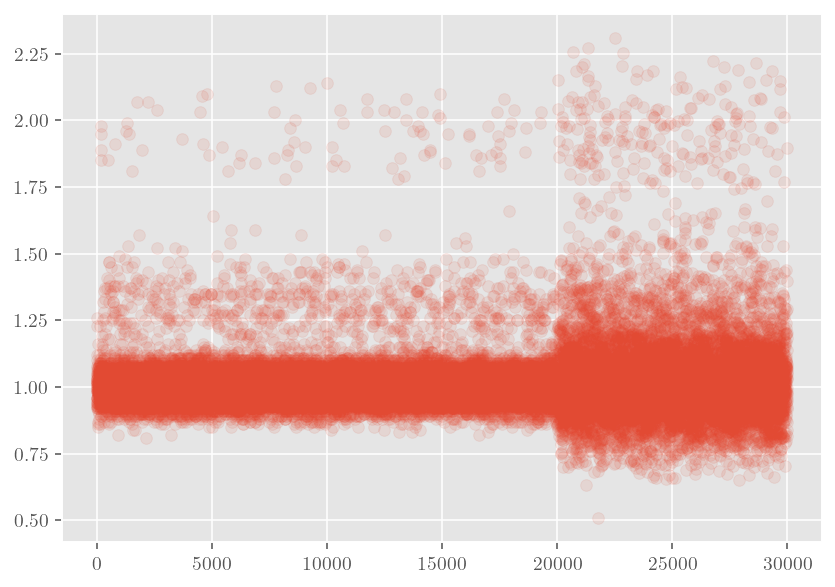

In [16]:
y = model.train_dataset.rewards.cpu().numpy() 
x = list(range(len(y)))
plt.scatter(x, y, alpha=0.1)



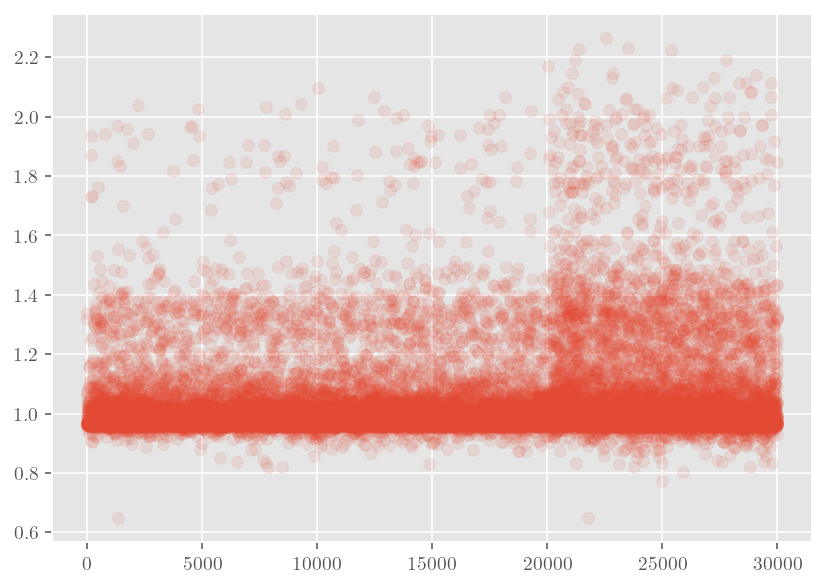

In [17]:
y = model.net(model.train_dataset.features).detach().cpu().numpy()
x = list(range(len(y)))
plt.scatter(x, y, alpha=0.1)

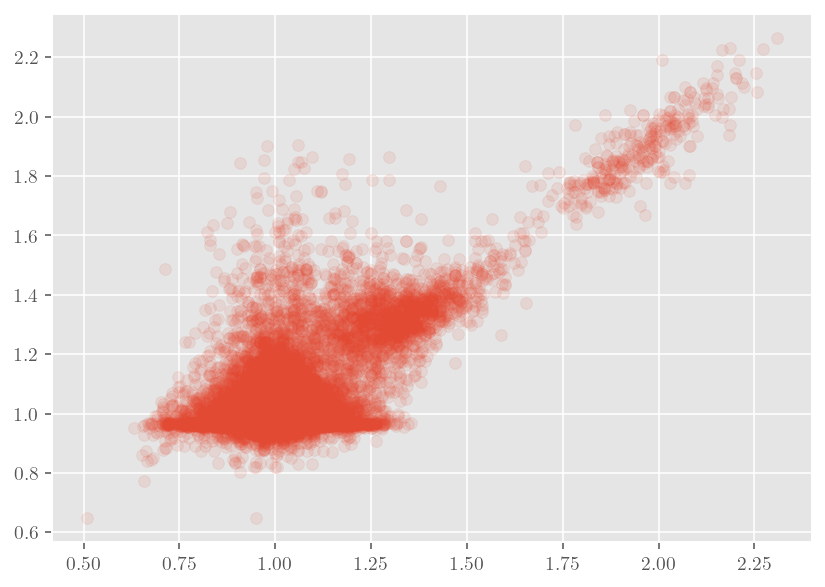

In [18]:
plt.scatter(model.train_dataset.rewards, y, alpha=0.1)

tensor(0.7900)


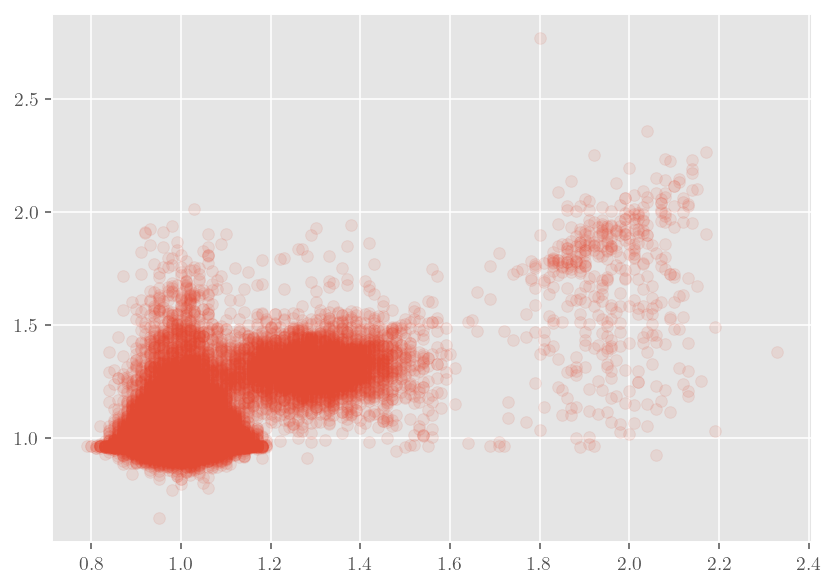

In [19]:
preds = model.net(combis.cpu()).detach().cpu().numpy()
plt.scatter(risks.cpu().numpy(), preds,alpha=0.1)
print(risks.min())

In [20]:
def compute_n_inter(tens1:torch.Tensor, tens2:torch.Tensor):
    set1 = tens1.unique(dim=0).tolist()
    set2 = tens2.unique(dim=0).tolist()
    
    set1 = set([tuple(item) for item in set1])
    set2 = set([tuple(item) for item in set2])

    inter = set1 & set2
    n_inter = len(set1 & set2)
    percent_of_set1_in_set2 = n_inter / len(set1)

    return n_inter, percent_of_set1_in_set2


In [21]:
all_flagged_combis_idx = list(all_flagged_combis_idx)
all_flagged_combis = combis[all_flagged_combis_idx]

compute_n_inter(all_flagged_combis, model.train_dataset.features)

(289, 0.439209726443769)